- Register env with ray.tune.registery
- training config
- can access policy with Algorithm.get_policy()
- check evaluation options in config
- check checkpoint options in config
- for fast env small model PPO: increase num_env_runners, maybe eneable vectorization for inference
- check batch size

In [154]:
from rleplus.examples.registry import register_all
register_all()

In [155]:
import ray
from ray import air, tune
from ray.rllib.algorithms.ppo import PPOConfig

In [156]:
env_setup = {
    "env": "BBrightEnv",
    "csv": False,
    "verbose": False,
    "output": "./tmp/episodes/",
    "num_workers": 1,
    "num_gpus": 0,
    "alg": "PPO",
    "use-lstm": True
}


config = (
    PPOConfig()
    .environment(
        env=env_setup["env"],
        env_config=env_setup,
    )
    .framework("torch")
    .training(
        gamma=0.95,
        lr=0.003,
        kl_coeff=0.3,
        train_batch_size=96,
        sgd_minibatch_size=96,
        vf_loss_coeff=0.01,
        use_critic=True,
        use_gae=True,
        model={
            "use_lstm": env_setup["use-lstm"],
            "vf_share_layers": False,
        },
        _enable_learner_api=True,
    )
    .rl_module(_enable_rl_module_api=True)
    .framework(
        # to use tensorflow, you'll need install it first,
        # then set framework="tf2" and eager_tracing=True (for fast exec)
        framework="torch",
    )
    .resources(num_gpus=env_setup["num_gpus"])
    .rollouts(
        num_rollout_workers=env_setup["num_workers"],
        rollout_fragment_length="auto",
    )
    
)

In [157]:
ray.shutdown()

In [158]:
ray.init()

register_all()

algo = config.build()
results = []
for i in range(370):
    result = algo.train()
    results.append(result)

    if i % 10 == 0:
        checkpoint = algo.save()
        print("checkpoint saved at", checkpoint)

ray.shutdown()

/home/l4/.cache/pypoetry/virtualenvs/rl-energyplus-hi-YszVVEjS-py3.10/lib/python3.10/site-packages/ray/_private/node.py:1308: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-08-10_02-14-35_940619_35277/logs/gcs_server.out' mode='a' encoding='utf-8'>
  self.start_gcs_server()
/home/l4/.cache/pypoetry/virtualenvs/rl-energyplus-hi-YszVVEjS-py3.10/lib/python3.10/site-packages/ray/_private/node.py:1308: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-08-10_02-14-35_940619_35277/logs/gcs_server.err' mode='a' encoding='utf-8'>
  self.start_gcs_server()
/home/l4/.cache/pypoetry/virtualenvs/rl-energyplus-hi-YszVVEjS-py3.10/lib/python3.10/site-packages/ray/_private/node.py:1313: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-08-10_02-14-35_940619_35277/logs/monitor.out' mode='a' encoding='utf-8'>
  self.start_monitor()
/home/l4/.cache/pypoetry/virtualenvs/rl-energyplus-hi-YszVVEjS-py3.10/lib/python3.10/sit

(RolloutWorker pid=102575) Episode: -1  finised at Timestep: 0


(RolloutWorker pid=102575) 2024-08-10 02:14:45,484	WARNING __init__.py:10 -- PG has/have been moved to `rllib_contrib` and will no longer be maintained by the RLlib team. You can still use it/them normally inside RLlib util Ray 2.8, but from Ray 2.9 on, all `rllib_contrib` algorithms will no longer be part of the core repo, and will therefore have to be installed separately with pinned dependencies for e.g. ray[rllib] and other packages! See https://github.com/ray-project/ray/tree/master/rllib_contrib#rllib-contrib for more information on the RLlib contrib effort.
(RolloutWorker pid=102575) /home/l4/.cache/pypoetry/virtualenvs/rl-energyplus-hi-YszVVEjS-py3.10/lib/python3.10/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
(RolloutWorker pid=102575)   gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


(RolloutWorker pid=102575) Episode: 0  finised at Timestep: 0


2024-08-10 02:14:49,089	WARNING util.py:62 -- Install gputil for GPU system monitoring.
/tmp/ipykernel_35277/3385920566.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/l4/ray_results/PPO_BBrightEnv_2024-08-10_02-12-16wuoynz6c/progress.csv' mode='a' encoding='UTF-8'>
  algo = config.build()
/tmp/ipykernel_35277/3385920566.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/l4/ray_results/PPO_BBrightEnv_2024-08-10_02-12-16wuoynz6c/result.json' mode='a' encoding='UTF-8'>
  algo = config.build()


(RolloutWorker pid=102575) Episode: 1  finised at Timestep: 1
(RolloutWorker pid=102575) Episode: 2  finised at Timestep: 96
checkpoint saved at TrainingResult(checkpoint=Checkpoint(filesystem=local, path=/tmp/tmpn5bui_va), metrics={'custom_metrics': {}, 'episode_media': {}, 'info': {'learner': {'__all__': {'num_agent_steps_trained': 1536.0, 'num_env_steps_trained': 96.0, 'total_loss': 0.7777804732322693}, 'default_policy': {'total_loss': 0.7777804732322693, 'policy_loss': 0.385167732834816, 'vf_loss': 9.580327033996582, 'vf_loss_unclipped': 1146.1837158203125, 'vf_explained_var': 0.0011990070343017578, 'entropy': 1.294449806213379, 'mean_kl_loss': 0.9893648624420189, 'default_optimizer_lr': 0.003, 'curr_lr': 0.003, 'curr_entropy_coeff': 0.0, 'curr_kl_coeff': 0.45000001788139343}}, 'num_env_steps_sampled': 96, 'num_env_steps_trained': 0, 'num_agent_steps_sampled': 96, 'num_agent_steps_trained': 0}, 'sampler_results': {'episode_reward_max': -195.74000000000004, 'episode_reward_min': -19

/usr/lib/python3.10/subprocess.py:1072: ResourceWarning: subprocess 101992 is still running
  _warn("subprocess %s is still running" % self.pid,
/usr/lib/python3.10/subprocess.py:1072: ResourceWarning: subprocess 101993 is still running
  _warn("subprocess %s is still running" % self.pid,


In [159]:
print(results[-1].keys())
print(results[-1]["info"].keys())
print(results[-1]["info"]["learner"].keys())
print(results[-1]["info"]["learner"]["default_policy"].keys())
print(results[-1]["info"]["learner"]["default_policy"])

dict_keys(['custom_metrics', 'episode_media', 'info', 'sampler_results', 'episode_reward_max', 'episode_reward_min', 'episode_reward_mean', 'episode_len_mean', 'episodes_this_iter', 'policy_reward_min', 'policy_reward_max', 'policy_reward_mean', 'hist_stats', 'sampler_perf', 'num_faulty_episodes', 'connector_metrics', 'num_healthy_workers', 'num_in_flight_async_reqs', 'num_remote_worker_restarts', 'num_agent_steps_sampled', 'num_agent_steps_trained', 'num_env_steps_sampled', 'num_env_steps_trained', 'num_env_steps_sampled_this_iter', 'num_env_steps_trained_this_iter', 'num_env_steps_sampled_throughput_per_sec', 'num_env_steps_trained_throughput_per_sec', 'timesteps_total', 'num_steps_trained_this_iter', 'agent_timesteps_total', 'timers', 'counters', 'done', 'episodes_total', 'training_iteration', 'trial_id', 'date', 'timestamp', 'time_this_iter_s', 'time_total_s', 'pid', 'hostname', 'node_ip', 'config', 'time_since_restore', 'iterations_since_restore', 'perf'])
dict_keys(['learner', 'n

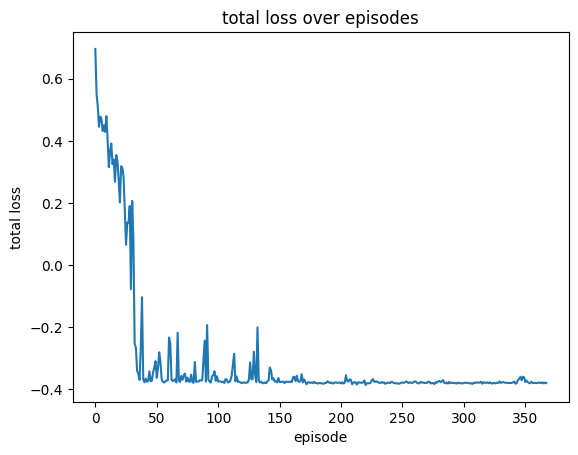

In [160]:
# plot log loss over episodes
import matplotlib.pyplot as plt
plt.plot([r["info"]["learner"]["default_policy"]['total_loss'] for r in results[2:]])
plt.xlabel("episode")
plt.ylabel("total loss")
plt.title("total loss over episodes")
# plt.yscale("log")

plt.show()

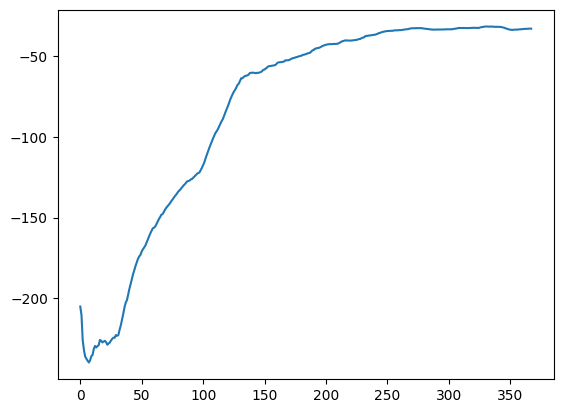

In [161]:
# plot mean reward over each episode
plt.plot([r['episode_reward_mean'] for r in results[2:]])
plt.show()

In [162]:
# read the result pickle file
import pickle as pkl

episode_results = []
# Read the history from the pickle
with open('./tmp/history.pkl', 'rb') as f:
    while True:
        try:
            episode_results.append(pkl.load(f))
        except EOFError:
            break

print(episode_results[0].keys())
print(len(episode_results))

# combine the results of each episode
import numpy as np

combined_results = {}
for k in episode_results[0].keys():
    combined_results[k] = np.concatenate([r[k] for r in episode_results])

print(combined_results.keys())
print(len(combined_results['reward']))

dict_keys(['out_tmp', 'air_tmp', 'opr_tmp', 'air_hum', 'htg_stp', 'clg_stp', 'eeq_htg', 'air_chg', 'rad_tmp', 'reward'])
362
dict_keys(['out_tmp', 'air_tmp', 'opr_tmp', 'air_hum', 'htg_stp', 'clg_stp', 'eeq_htg', 'air_chg', 'rad_tmp', 'reward'])
34752


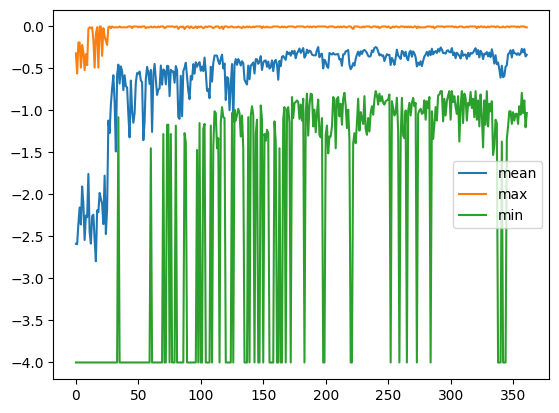

In [164]:
# pad a zero at the beginning of the rewards to make it the same length as the actions
comb_rewards = np.concatenate([np.zeros(1), combined_results['reward']])
comb_rewards = comb_rewards[1:]

# get the mean, max, min, std of the rewards per episode (96 time steps)
mean_rewards = np.mean(comb_rewards.reshape(-1, 96), axis=1)
max_rewards = np.max(comb_rewards.reshape(-1, 96), axis=1)
min_rewards = np.min(comb_rewards.reshape(-1, 96), axis=1)

# plot the mean, max, min rewards over episodes
plt.plot(mean_rewards, label='mean')
plt.plot(max_rewards, label='max')
plt.plot(min_rewards, label='min')
plt.legend()
plt.show()

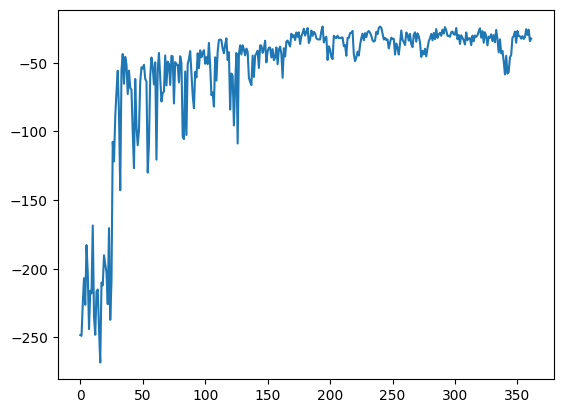

In [165]:
# get the total rewards per episode (96 time steps)
total_rewards = np.sum(comb_rewards.reshape(-1, 96), axis=1)

# plot the total rewards over episodes
plt.plot(total_rewards)
plt.show()